<a href="https://colab.research.google.com/github/mauguzar98/graficas-pyhton/blob/master/Copia_de_serie_fourier_discreta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive, fixed
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Estimación de Serie de Fourier Tiempo Discreto

$$ X[k] = \frac{1}{N} \sum_{n=<N>} x[n] e^{-j k 2 \pi n/N} $$

sea la serie 

$$ x[n]= \{0.2, 0.3, 0.4, -0.4, -0.3, -0.2\} $$

Con periodo N=6, 

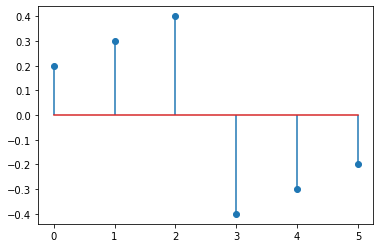

In [0]:
# la señal puede ser descrita por
x=[0.2, 0.3, 0.4, -0.4, -0.3, -0.2]
N=6
n=np.arange(0,N)

plt.stem(n,x, use_line_collection=True)
plt.show()

Dada la defición de la estimación de los componentes de la serie de Fourier esta estimación puede verse como un producto punto entre el vector de señal y una matriz de exponenciales de la siguiente forma:


$$ E=\left[ \begin{array}{ccccc} 
   1 & 1 & 1 &\cdots & 1 \\
   1 & e^{-j \cdot  2 \pi /N} & e^{-j \cdot  2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  2 \pi \cdot N-1/N} \\ 
   1 & e^{-j \cdot  2 \cdot 2 \pi /N} & e^{-j \cdot  2 \cdot 2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  2 \cdot 2 \pi \cdot N-1/N} \\ 
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & e^{-j \cdot  N-1 \cdot 2 \pi /N} & e^{-j \cdot  N-1 \cdot 2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  N-1 \cdot 2 \pi \cdot N-1/N}  \end{array} \right] $$
   
   
Dicha matriz tiene dimensiones $\left[N \times N \right]$ y la señal vista como vector renglón tiene dimensiones $\left[1 \times N\right]$:

$$ x = \left[ x[0], x[1], x[2], \cdots, x[N-1] \right] $$

Por lo que el producto:

$$ Ak = \frac{1}{N} \cdot x \cdot E $$

Tiene dimensiones $\left[1 \times N \right]$, y se puede comprobar que cada entrada es la evaluación de la primera ecuación mostrada en esta libreta para los valores de $ k = 0, 1, 2, \cdots , N-1 $

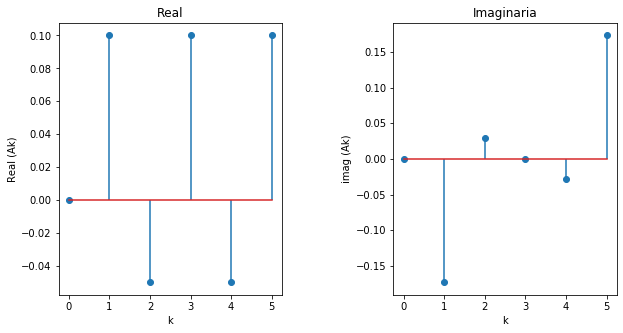

[ 0.  +0.00000000e+00j  0.1 -1.73205081e-01j -0.05+2.88675135e-02j
  0.1 +8.98280646e-17j -0.05-2.88675135e-02j  0.1 +1.73205081e-01j]


In [0]:
# Construyendo la matriz E
k=np.arange(0,N)

# Como k y n corren con los mismos valores se aprovecha esta simetria para solo usar esta variable al construir E
E= np.exp(-1j*np.outer(k,k)*2*np.pi / N)
Ak= np.dot(x,E) / N

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.stem(k, np.real(Ak), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('Real (Ak)')
plt.title('Real')

plt.subplot(1, 2, 2)
plt.stem(k,np.imag(Ak), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('imag (Ak)')
plt.title('Imaginaria')

plt.show()
print(Ak)

Lo mismo pero ahora extendemos el calculo de k hasta 17 para observar que es lo que sucede

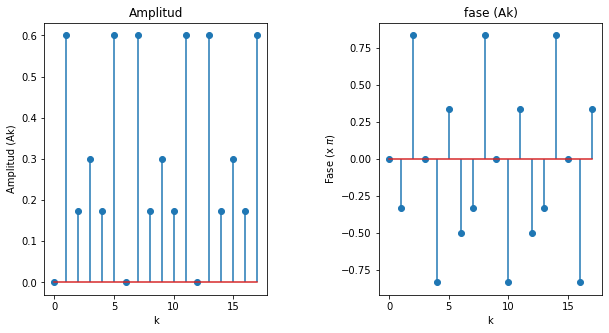

In [0]:
k=np.arange(0,3*N)
E= np.exp(-1j*np.outer(k,k)*2*np.pi / N)
Ak= np.dot(np.concatenate((x,x,x)),E) / N

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.stem(k,np.abs(Ak), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('Amplitud (Ak)')
plt.title('Amplitud')

plt.subplot(1, 2, 2)
plt.stem(k,np.angle(Ak)/np.pi, use_line_collection=True)
plt.xlabel('k')
plt.ylabel(r'Fase (x $\pi$)')
plt.title('fase (Ak)')

plt.show()

Ahora mediante la ecuación de síntesis podemos reconstruir la señal en tiempo discreto.

$$ x[n] = \sum_{k=0}^{N-1} A_k e^{j k 2 \pi n/N }$$

note que el límite de la sumatoria está definido por $k$, de tal forma que los valores de $n$ pueden elegirse libremente. Al igual que para la ecuación de análisis la reconstrucción en tiempo puede verse también como un producto punto, pero con la versión conjugada de la matriz E. Tal y como se muestra en el código

$$ x[n] = Ak \cdot E $$

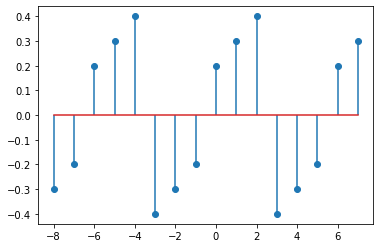

In [0]:
# seleccionamos valores de n cualesquiera
n=np.arange(-8,8)

# recuperamos los valores de Ak para sólo seis muestras
k=np.arange(0,N)
E= np.exp(-1j*np.outer(k,k)*2*np.pi / N)
Ak= np.dot(x,E) / N

# Ahora E es su versión conjugada, observe que el primer elemento de la multiplicación ahora es 1j
E= np.exp(1j*np.outer(k,n)*2*np.pi / N)

x_rec= np.real(np.dot(Ak,E))
plt.stem(n,x_rec, use_line_collection=True)
plt.show()

# ¿Qué pasa si extendemos el número de ceros?

De acuerdo a la defición del vector señal este quedaría de la siguiente forma

$$ x = \left[ x[0], x[1], x[2], \cdots, x[N-1] , 0 , 0, \cdots \right] $$

En la ecuación anterior $x[N-1]$ indica el último valor conocido de la señal, y los ceros son agregados posteriormente. Esto produce que la señal incremente su número de muestras a $N= N + M$, o sea que el número de muestras ahora es el número de muestras que teníamos más el número de ceros que fueron concatenados. La matriz $E$ por su parte continua con su misma definición, ya que ahora $N$ es el número de muestras actualizado.

$$ E=\left[ \begin{array}{ccccc} 
   1 & 1 & 1 &\cdots & 1 \\
   1 & e^{-j \cdot  2 \pi /N} & e^{-j \cdot  2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  2 \pi \cdot N-1/N} \\ 
   1 & e^{-j \cdot  2 \cdot 2 \pi /N} & e^{-j \cdot  2 \cdot 2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  2 \cdot 2 \pi \cdot N-1/N} \\ 
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & e^{-j \cdot  N-1 \cdot 2 \pi /N} & e^{-j \cdot  N-1 \cdot 2 \pi \cdot 2/N} & \cdots & e^{-j \cdot  N-1 \cdot 2 \pi \cdot N-1/N}  \end{array} \right] $$


In [0]:
# definimos ahora la función análisis como la ecuación de análisis de la serie de Fourier, el único argumento que recibe 
# esta fucnión es la señal a analizar ya que el resto de la función se construye dentro de la misma. Regresa los valores
# de Ak y k necesarios para poder hacer la ecuación de síntesis

def analisis(x=[1,2,3,4,0,0]):
    
    N=len(x)
    # Construyendo la matriz E
    k=np.arange(0,N)

    # Como k y n corren con los mismos valores se aprovecha esta simetria para solo usar esta variable al construir E
    E= np.exp(-1j*np.outer(k,k)*2*np.pi / N)
    Ak= np.dot(x,E) / N
        
    return Ak

In [0]:
# definimos la ecuación de síntesis como un producto punto entre los valores Ak y la matriz E que ya ha sido descrita.
# Recibe como parámetros de entrada los valores Ak y los valores de n donde se evaluará la recosntrucción de la señal

def sintesis(Ak=[1,0,1],n = [0, 1, 2]):

    N=len(Ak)
    k=np.arange(0,N)
    E= np.exp(1j*np.outer(k,n)*2*np.pi / N)

    x= np.dot(Ak,E)
    return x

In [0]:
def agrega_ceros(x,M=0):
    N_ini=len(x)
    
    x_ini=x
    x=np.concatenate((x,np.zeros(M,dtype=float)))
    N=len(x)
    n=np.arange(0,N)
    plt.subplot(1,2,1)
    plt.stem(n,x)
        
    k=np.arange(0,N)
    w=np.linspace(0,2*np.pi,500)
    
    aux=np.exp(1j*w)
    plt.subplot(1,2,2)
    plt.plot(np.real(aux),np.imag(aux),linewidth=2)
    wo_ini=np.arange(0,N_ini)* 2*np.pi/N_ini
    wo = np.arange(0,N)* 2*np.pi/N    
    
    #pintamos los puntos en el círculo que corresponden a las exponenciales complejas de la matriz E
    #
    aux=np.exp(1j*wo)
    plt.plot(np.real(aux),np.imag(aux),'ro',label='wo ceros',markersize=9)
    aux=np.exp(1j*wo_ini)
    plt.plot(np.real(aux),np.imag(aux),'bo',label='wo inicial')
        
    plt.axis('equal')
    plt.legend()
    plt.show()
    
    Ak_ini = analisis(x_ini)
    Ak = analisis(x)
    
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(2,1,1)
    plt.stem(wo,np.abs(Ak),'r', use_line_collection=True)
    plt.stem(wo_ini,np.abs(Ak_ini),'b', use_line_collection=True)
    plt.title('amplitud')
    
    plt.subplot(2,1,2)
    plt.stem(wo,np.angle(Ak)/np.pi,'r', use_line_collection=True)
    plt.stem(wo_ini,np.angle(Ak_ini)/np.pi,'b', use_line_collection=True)
    plt.title('Fase')
    
    plt.show()
    
    
    n=np.arange(-2*N,2*N)
    x_rec=sintesis(Ak,n)
    plt.stem(n,x_rec, use_line_collection=True)
    plt.title('reconstruida')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


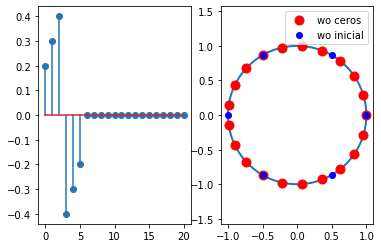

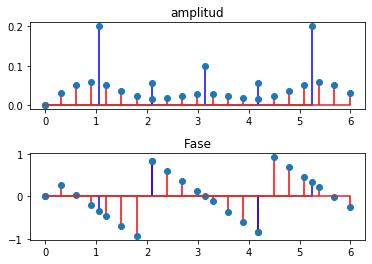

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


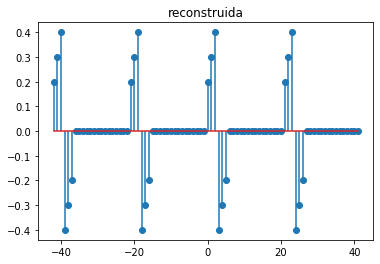

In [0]:
agrega_ceros(x,15)